# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 27.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
2043,0.1611,0.0049,0.0024,0.0024,0.0049,0.0024,0.0049,0.1514,0.0024,0.0366,3,0,1,0
417629,2.0239,0.5591,0.3809,0.0879,0.0439,0.0610,0.4590,2.8809,0.1880,0.1465,2,2,20,20
163229,0.0049,0.1074,0.0024,0.0024,0.0024,0.0024,0.0122,0.0024,0.0024,0.0757,0,0,0,0
164344,0.0024,0.1050,0.0317,0.0024,0.0049,0.0024,0.0024,0.2490,0.0049,0.1123,6,6,8,8
97541,0.0415,0.0024,0.0049,0.0049,0.0024,0.0049,0.0024,0.0708,0.0049,0.0049,0,0,0,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466175 entries, 0 to 466174
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          466175 non-null  float64
 1   Emg2          466175 non-null  float64
 2   Emg3          466175 non-null  float64
 3   Emg4          466175 non-null  float64
 4   Emg5          466175 non-null  float64
 5   Emg6          466175 non-null  float64
 6   Emg7          466175 non-null  float64
 7   Emg8          466175 non-null  float64
 8   Emg9          466175 non-null  float64
 9   Emg10         466175 non-null  float64
 10  repetition    466175 non-null  int64  
 11  rerepetition  466175 non-null  int64  
 12  stimulus      466175 non-null  int64  
 13  restimulus    466175 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 49.8 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,466175.000000,466175.000000,466175.000000,466175.000000,466175.000000,466175.000000,466175.000000,466175.000000,466175.000000,466175.000000,466175.000000,466175.000000,466175.000000,466175.000000
mean,0.283236,0.072650,0.090658,0.029487,0.011465,0.006873,0.088149,0.316144,0.062414,0.093988,3.169428,2.528250,5.618386,4.469551
std,0.413874,0.170137,0.257313,0.124365,0.037662,0.020497,0.222997,0.485001,0.177552,0.106385,3.484731,3.364871,6.582545,6.268219
min,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.043900,0.002400,0.004900,0.002400,0.004900,0.002400,0.004900,0.039100,0.002400,0.051300,0.000000,0.000000,0.000000,0.000000
50%,0.144000,0.004900,0.004900,0.004900,0.004900,0.002400,0.034200,0.139200,0.004900,0.068400,2.000000,0.000000,3.000000,0.000000
75%,0.341800,0.061000,0.048800,0.004900,0.004900,0.004900,0.090300,0.395500,0.031700,0.092800,6.000000,5.000000,10.000000,8.000000
max,4.643600,3.574200,4.636200,4.443400,1.276900,0.666500,4.638700,4.646000,4.636200,2.529300,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     197577
2      15545
7      15537
8      15533
12     15528
4      15524
9      15487
11     15479
6      15478
5      15475
10     15447
3      15443
1      15442
13     10376
14     10367
17     10336
15     10316
16     10281
19      5197
21      5188
18      5180
23      5167
22      5142
20      5130
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.700169,-0.428448,-0.36269,-0.235731,-0.193560,-0.228877,-0.381884,-0.663211,-0.363130,-0.250818
1,-0.694463,-0.442126,-0.37168,-0.217289,-0.193560,-0.228877,-0.371527,-0.658363,-0.363130,-0.315970
2,-0.700169,-0.428448,-0.37168,-0.235731,-0.193560,-0.228877,-0.381884,-0.663211,-0.350075,-0.359703
3,-0.694463,-0.442126,-0.36269,-0.217289,-0.254414,-0.116016,-0.371527,-0.663211,-0.350075,-0.381123
4,-0.700169,-0.442126,-0.36269,-0.235731,-0.193560,-0.116016,-0.371527,-0.658363,-0.363130,-0.403435
...,...,...,...,...,...,...,...,...,...,...
388467,0.893447,-0.428448,-0.36269,-0.217289,-0.193560,-0.116016,-0.139108,0.146317,0.147070,-0.272238
388468,0.793033,-0.442126,-0.36269,-0.217289,-0.193560,-0.228877,-0.169351,0.193628,0.121482,-0.250818
388469,0.681665,-0.428448,-0.37168,-0.217289,-0.193560,-0.228877,-0.209952,0.174820,0.147070,-0.272238
388470,0.642641,-0.428448,-0.37168,-0.217289,-0.254414,-0.228877,-0.240195,0.146317,0.172658,-0.294550


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ELU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [19]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(3000, activation='relu')(visible)
hidden2 = Dense(1500, activation='relu')(hidden1)
hidden3 = Dropout(0.2)(hidden2)
hidden4 = Dense(750, activation='relu')(hidden3)
hidden5 = Dense(375, activation='relu')(hidden4)
hidden6 = Dense(48, activation='relu')(hidden5)
output = Dense(num_classes, activation='softmax')(hidden6)
model = Model(inputs=visible, outputs=output)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 3000)              33000     
                                                                 
 dense_1 (Dense)             (None, 1500)              4501500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 750)               1125750   
                                                                 
 dense_3 (Dense)             (None, 375)               281625    
                                                                 
 dense_4 (Dense)             (None, 48)                18048 

# 2. Compile Network

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [23]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
77/77 [==============================] - 3s 27ms/step - loss: 1.5654 - accuracy: 0.5957 - val_loss: 1.2009 - val_accuracy: 0.6651
Epoch 2/100
77/77 [==============================] - 2s 25ms/step - loss: 1.1073 - accuracy: 0.6886 - val_loss: 1.0166 - val_accuracy: 0.7100
Epoch 3/100
77/77 [==============================] - 2s 26ms/step - loss: 0.9740 - accuracy: 0.7223 - val_loss: 0.9242 - val_accuracy: 0.7334
Epoch 4/100
77/77 [==============================] - 2s 25ms/step - loss: 0.8984 - accuracy: 0.7403 - val_loss: 0.8565 - val_accuracy: 0.7507
Epoch 5/100
77/77 [==============================] - 2s 25ms/step - loss: 0.8438 - accuracy: 0.7545 - val_loss: 0.8140 - val_accuracy: 0.7607
Epoch 6/100
77/77 [==============================] - 2s 25ms/step - loss: 0.8080 - accuracy: 0.7637 - val_loss: 0.7858 - val_accuracy: 0.7688
Epoch 7/100
77/77 [==============================] - 2s 25ms/step - loss: 0.7755 - accuracy: 0.7718 - val_loss: 0.7652 - val_accuracy: 0.7738
Epoch 

77/77 [==============================] - 2s 26ms/step - loss: 0.4060 - accuracy: 0.8714 - val_loss: 0.4664 - val_accuracy: 0.8569
Epoch 59/100
77/77 [==============================] - 2s 26ms/step - loss: 0.4043 - accuracy: 0.8722 - val_loss: 0.4679 - val_accuracy: 0.8554
Epoch 60/100
77/77 [==============================] - 2s 27ms/step - loss: 0.4023 - accuracy: 0.8728 - val_loss: 0.4697 - val_accuracy: 0.8577
Epoch 61/100
77/77 [==============================] - 2s 26ms/step - loss: 0.4005 - accuracy: 0.8734 - val_loss: 0.4655 - val_accuracy: 0.8563
Epoch 62/100
77/77 [==============================] - 2s 27ms/step - loss: 0.3988 - accuracy: 0.8737 - val_loss: 0.4611 - val_accuracy: 0.8587
Epoch 63/100
77/77 [==============================] - 2s 27ms/step - loss: 0.3995 - accuracy: 0.8734 - val_loss: 0.4652 - val_accuracy: 0.8578
Epoch 64/100
77/77 [==============================] - 2s 26ms/step - loss: 0.3939 - accuracy: 0.8754 - val_loss: 0.4590 - val_accuracy: 0.8579
Epoch 65/100

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

Text(0.5, 1.0, 'Loss Curve of Deep Neural Netowork')

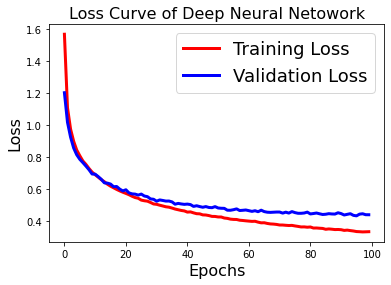

In [24]:
#Loss Curve


plt.plot(figsize = [8,6])

plt.plot(history.history['loss'],'r',linewidth = 3.0)
plt.plot(history.history['val_loss'],'b',linewidth = 3.0)

plt.legend(['Training Loss', 'Validation Loss'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)

plt.title('Loss Curve of Deep Neural Netowork' , fontsize = 16 )



Text(0.5, 1.0, 'Accuracy Curve of Deep Neural Netowork')

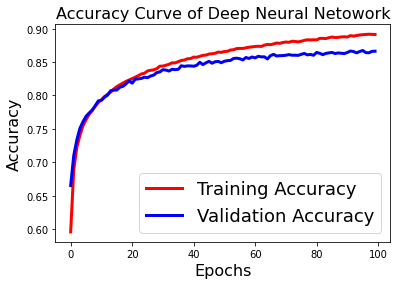

In [25]:
#Accuracy Curve

plt.plot(figsize = [8,6])
plt.plot(history.history['accuracy'],'r',linewidth = 3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth = 3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)


plt.title('Accuracy Curve of Deep Neural Netowork' , fontsize = 16 )

##  4.2 Make Predictions

In [26]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

In [27]:
predictions

array([12,  4,  0, ...,  0,  5,  2], dtype=int64)

#### Transforming from One Hot Encoding

In [28]:
y_test =np.argmax(y_test, axis=1)
y_test[1]

4

In [29]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, predictions)}
print(f"Accuracy is: {accuracy_score(y_test, predictions)* 100}")

Accuracy is: 86.62848317137525


## 4.3 Classification Report

Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     37017
           1       0.89      0.76      0.82      2324
           2       0.91      0.83      0.87      2103
           3       0.89      0.76      0.82      2358
           4       0.84      0.80      0.82      2374
           5       0.94      0.90      0.92      2160
           6       0.94      0.86      0.90      2347
           7       0.86      0.82      0.84      2304
           8       0.78      0.73      0.75      2562
           9       0.79      0.60      0.68      2658
          10       0.78      0.70      0.74      2191
          11       0.84      0.76      0.80      2482
          12       0.88      0.83      0.86      2430
          13       0.80      0.78      0.79      1486
          14       0.78      0.83      0.80      1457
          15       0.82      0.78      0.80      1441
          16       0.92      0.89      0.90      1524
 

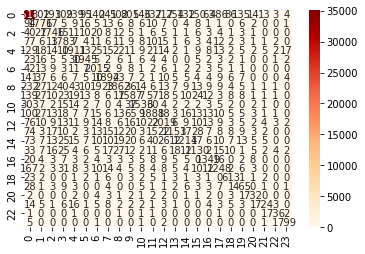

In [30]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, predictions))

cm = confusion_matrix(predictions, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

## 4.4 Evaluation

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.1132762726044148
MSE: 12.569174335542828
RMSE: 3.5453031373273043


In [32]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, predictions, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, predictions,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, predictions,average='weighted'))

Precision Score :  0.8655118473387995
Recall Score :  0.8662848317137525
f1_score :  0.8636280410883703
